In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))  # Go up one directory

from llm_provider import LLM_provider
llm=LLM_provider()
model=llm.get_llm()
model.invoke("hi")



AIMessage(content='Hello! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 8, 'total_tokens': 18, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4.1-2025-04-14', 'system_fingerprint': 'fp_f99638a8d7', 'id': 'chatcmpl-D6bcNqzpr9EgdBkFuCp537ZIkOHCj', 'service_tier': None, 'prompt_filter_results': [{'prompt_index': 0, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'jailbreak': {'detected': False, 'filtered': False}, 'self_harm': {'filtered': False, 'severity': 'safe'}, 'sexual': {'filtered': False, 'severity': 'safe'}, 'violence': {'filtered': False, 'severity': 'safe'}}}], 'finish_reason': 'stop', 'logprobs': None, 'content_filter_results': {'hate': {'filtered': False, 'severity': 'safe'}, 'pr

In [2]:
url="https://lilianweng.github.io/posts/2023-06-23-agent/"

In [3]:
from langchain_community.document_loaders import WebBaseLoader

USER_AGENT environment variable not set, consider setting it to identify your requests.


In [4]:
web_loader=WebBaseLoader(url)

In [5]:
docs=web_loader.load()

In [6]:
docs[0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [7]:
urls=["https://lilianweng.github.io/posts/2023-06-23-agent/",
"https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/"]

In [8]:
docs=[WebBaseLoader(url).load() for url in urls]

In [9]:
docs

[[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final res

In [10]:
docs[0][0].metadata

{'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/',
 'title': "LLM Powered Autonomous Agents | Lil'Log",
 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final results.\n\n\nMemory\

In [11]:
docs_list=[item for sub_list in docs for item in sub_list]

In [12]:
from langchain_text_splitters import RecursiveCharacterTextSplitter

In [13]:
text_splitter=RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=100,chunk_overlap=25)


In [14]:
docs_splitter=text_splitter.split_documents(docs_list)
docs_splitter

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview\nIn a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:\n\nPlanning\n\nSubgoal and decomposition: The agent breaks down large tasks into smaller, manageable subgoals, enabling efficient handling of complex tasks.\nReflection and refinement: The agent can do self-criticism and self-reflection over past actions, learn from mistakes and refine them for future steps, thereby improving the quality of final resu

In [15]:
from langchain_community.vectorstores import Chroma

In [16]:
embedding_model=llm.get_embedding_model()

In [17]:
vectorstore=Chroma.from_documents(documents=docs_splitter,collection_name='rag-chrome',embedding=embedding_model)

In [18]:
retriever=vectorstore.as_retriever()

In [19]:
retriever.invoke("what is agent and prompt")

[Document(metadata={'title': "Prompt Engineering | Lil'Log", 'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models. At its core, the goal of prompt engineering is about alignment and model steerability. Check my previous post on controllable text generation.', 'language': 'en'}, page_content='Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the mode

In [20]:
from langchain.tools.retriever import create_retriever_tool

In [21]:
retriever_tools=create_retriever_tool(
    retriever,
    'retriever_blog_post',
    "Search and return infomration about Lilian Weng blog posts on LLM Agents etc"
)

In [22]:
tools=[retriever_tools]

In [23]:
from langgraph.prebuilt import ToolNode

In [24]:
retriever_node=ToolNode(tools)

In [37]:
from langgraph.graph import StateGraph,START,END,MessagesState
from langchain_core.prompts import PromptTemplate
from langchain_core.messages import HumanMessage

In [38]:
llm_with_tool=model.bind_tools(tools)

In [49]:
response=llm_with_tool.invoke("what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?if tools use that")

In [155]:
response.pretty_print()

================================== Ai Message ==================================

Let’s break down **LLM Powered Autonomous Agents** and the concepts of **planning**, **reflection**, and **prompt engineering**—especially in the context of agents and LangChain.

---

## 1. What are LLM Powered Autonomous Agents?

**LLM Powered Autonomous Agents** are systems that use Large Language Models (LLMs) (like GPT-4) to perform tasks autonomously. These agents can:

- Receive goals or instructions.
- Plan steps to achieve those goals.
- Execute actions (like calling APIs, searching the web, or interacting with databases).
- Reflect on their progress and adapt their strategy.

**LangChain** is a popular framework for building such agents, allowing you to combine LLMs with tools, memory, and reasoning capabilities.

---

## 2. Planning

**Planning** is how agents decide what steps to take to achieve a goal.

- **In LangChain:** Agents use LLMs to generate a plan (sequence of actions/tools to use).

In [ ]:
print(dir(response))
"""['__abstractmethods__', '__add__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_computed_fields__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init__', '__pydantic_private__', '__pydantic_root_model__', '__pydantic_serializer__', '__pydantic_setattr_handlers__', '__pydantic_validator__', '__reduce__', '__reduce_ex__', '__replace__', '__repr__', '__repr_args__', '__repr_name__', '__repr_recursion__', '__repr_str__', '__rich_repr__', '__setattr__', '__setstate__', '__signature__', '__sizeof__', '__slots__', '__str__', '__subclasshook__', '__weakref__', '_abc_impl', '_backwards_compat_tool_calls', '_calculate_keys', '_copy_and_set_values', '_get_value', '_iter', '_setattr_handler', 'additional_kwargs', 'construct', 'content', 'copy', 'dict', 'example', 'from_orm', 'get_lc_namespace', 'id', 'invalid_tool_calls', 'is_lc_serializable', 'json', 'lc_attributes', 'lc_id', 'lc_secrets', 'model_computed_fields', 'model_config', 'model_construct', 'model_copy', 'model_dump', 'model_dump_json', 'model_extra', 'model_fields', 'model_fields_set', 'model_json_schema', 'model_parametrized_name', 'model_post_init', 'model_rebuild', 'model_validate', 'model_validate_json', 'model_validate_strings', 'name', 'parse_file', 'parse_obj', 'parse_raw', 'pretty_print', 'pretty_repr', 'response_metadata', 'schema', 'schema_json', 'text', 'to_json', 'to_json_not_implemented', 'tool_calls', 'type', 'update_forward_refs', 'usage_metadata', 'validate']"""

['__abstractmethods__', '__add__', '__annotations__', '__class__', '__class_getitem__', '__class_vars__', '__copy__', '__deepcopy__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__fields__', '__fields_set__', '__format__', '__ge__', '__get_pydantic_core_schema__', '__get_pydantic_json_schema__', '__getattr__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__pretty__', '__private_attributes__', '__pydantic_complete__', '__pydantic_computed_fields__', '__pydantic_core_schema__', '__pydantic_custom_init__', '__pydantic_decorators__', '__pydantic_extra__', '__pydantic_fields__', '__pydantic_fields_set__', '__pydantic_generic_metadata__', '__pydantic_init_subclass__', '__pydantic_parent_namespace__', '__pydantic_post_init__', '__pydantic_private__', '__pydantic_root_model__', '__pydantic_serializer__', '__pydantic_setattr_handlers__', '__pydantic_validator__', '__

['__abstractmethods__',
 '__add__',
 '__annotations__',
 '__class__',
 '__class_getitem__',
 '__class_vars__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__fields__',
 '__fields_set__',
 '__format__',
 '__ge__',
 '__get_pydantic_core_schema__',
 '__get_pydantic_json_schema__',
 '__getattr__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__pretty__',
 '__private_attributes__',
 '__pydantic_complete__',
 '__pydantic_computed_fields__',
 '__pydantic_core_schema__',
 '__pydantic_custom_init__',
 '__pydantic_decorators__',
 '__pydantic_extra__',
 '__pydantic_fields__',
 '__pydantic_fields_set__',
 '__pydantic_generic_metadata__',
 '__pydantic_init_subclass__',
 '__pydantic_parent_namespace__',
 '__pydantic_post_init__',
 '__pydantic_private__',
 '__pydantic_root_model__',
 '__pydantic_serializer__',
 '__pydantic_s

In [50]:
response.tool_calls

[]

In [114]:
def llm_decision_maker(state:MessagesState):
    print("----CALL LLM_DECISION_MAKER----")
    message=state["messages"]
    last_message=message[-1]
    question=last_message.content
    response=llm_with_tool.invoke(question)
    return {"messages":[response]}

In [ ]:
# state={"messages":["Hi how are youy"]}
# result=llm_decision_maker(state)

""" so the above statement is going to give error becasue here this "messages":["Hi how are youy"] 
doesnt have content variable in it hence we always have to give in human message form like this 
"""

state = {"messages": [HumanMessage(content="what is LLM Powered Autonomous Agents explain the planning and reflection and prompt engineering explain me in terms of agents and langchain?")]}
llm_decision_maker(state)


----CALL LLM_DECISION_MAKER----


AttributeError: 'dict' object has no attribute 'pretty_print'

In [116]:
""" in the above output notice one thing when
we call fucntion direclty we do not get the human message object in response
and we get only AI Message its because we dont have a compiled langgraph execution when we 
create a worfklow with stage graph that time it will give humanessage because of 
Why it worked HERE but not THERE (one clear rule)

Reducers (add_messages) only run inside a compiled LangGraph execution.

They do not run:

in unit tests that call node functions directly

in plain Python execution

in notebooks unless you use graph.invoke() 14 june notebook
"""

' in the above output notice one thing when\nwe call fucntion direclty we do not get the human message object in response\nand we get only AI Message its because we dont have a compiled langgraph execution when we \ncreate a worfklow with stage graph that time it will give humanessage because of \nWhy it worked HERE but not THERE (one clear rule)\n\nReducers (add_messages) only run inside a compiled LangGraph execution.\n\nThey do not run:\n\nin unit tests that call node functions directly\n\nin plain Python execution\n\nin notebooks unless you use graph.invoke() 14 june notebook\n'

In [117]:
from langchain_core.pydantic_v1 import BaseModel , Field


In [118]:
class Grade(BaseModel):
    binary_score:str=Field(description="Relevance score 'yes' or 'no'")

In [119]:
from typing import Literal

In [120]:
def grade_documents(state:MessagesState)->Literal["Output Generator", "Query Rewriter"]:
    print("----CALLING GRADE FOR CHECKING RELEVANCY----")
    llm_with_structure_op=model.with_structured_output(Grade)
    
    prompt=PromptTemplate(
        template="""You are a grader deciding if a document is relevant to a user’s question.
                    Here is the document: {context}
                    Here is the user’s question: {question}
                    If the document talks about or contains information related to the user’s question, mark it as relevant. 
                    Give a 'yes' or 'no' answer to show if the document is relevant to the question.""",
                    input_variables=["context", "question"]
                    )
     
    chain=prompt|llm_with_structure_op
     
     
    message=state['messages']
    
    last_message = message[-1]
    
    question = message[0].content
    
    docs = last_message.content
    
    scored_result=chain.invoke({"question": question, "context": docs})
    
    score=scored_result.binary_score
     
    if score=="yes":
        print("----DECISION: DOCS ARE RELEVANT----")
        return "generator"
    else:
        print("----DECISION: DOCS ARE NOT RELEVANT----")
        return "rewriter"

In [121]:
from langchain import hub

In [122]:
hub.pull("rlm/rag-prompt").pretty_print()

================================ Human Message =================================

You are an assistant for question-answering tasks. Use the following pieces of retrieved context to answer the question. If you don't know the answer, just say that you don't know. Use three sentences maximum and keep the answer concise.
Question: {question} 
Context: {context} 
Answer:


In [138]:
def generate(state:MessagesState):
    print("----RAG OUTPUT GENERATE----")
    
    message=state["messages"]
    question=message[0].content
    
    last_message = message[-1]
    docs = last_message.content
    
    prompt=hub.pull("rlm/rag-prompt")
    
    rag_chain=prompt | model
    
    response=rag_chain.invoke({"context": docs, "question": question})
    
    print(f"this is my response:{response}")
    
    return {"messages": [response]}

In [139]:
from langchain_core.messages import HumanMessage


In [140]:
def rewrite(state:MessagesState):
    print("----TRANSFORM QUERY----")
    message=state["messages"]
    
    question=message[0].content
    
    prompt= [HumanMessage(content=f"""Look at the input and try to reason about the underlying semantic intent or meaning. 
                    Here is the initial question: {question} 
                    Formulate an improved question: """)
       ]

    response=model.invoke(prompt)
    
    return {"messages": [response]}

In [141]:
workflow=StateGraph(MessagesState)

In [142]:
workflow.add_node("LLM Decision Maker",llm_decision_maker)
workflow.add_node("Vector Retriever",retriever_node)
workflow.add_node("Output Generator",generate)
workflow.add_node("Query Rewriter",rewrite)


In [143]:
workflow.add_edge(START,"LLM Decision Maker")

In [144]:
from langgraph.prebuilt import tools_condition

In [145]:
workflow.add_conditional_edges("LLM Decision Maker",
                               tools_condition,
                               {"tools":"Vector Retriever",
                                END:END
                                })

In [146]:
workflow.add_conditional_edges("Vector Retriever",
                               grade_documents,
                               {"generator":"Output Generator",
                                "rewriter":"Query Rewriter"
                                })

In [147]:
workflow.add_edge("Output Generator",END)

In [148]:
workflow.add_edge("Query Rewriter","LLM Decision Maker")

In [149]:
app=workflow.compile()

In [150]:
from IPython.display import Image,display

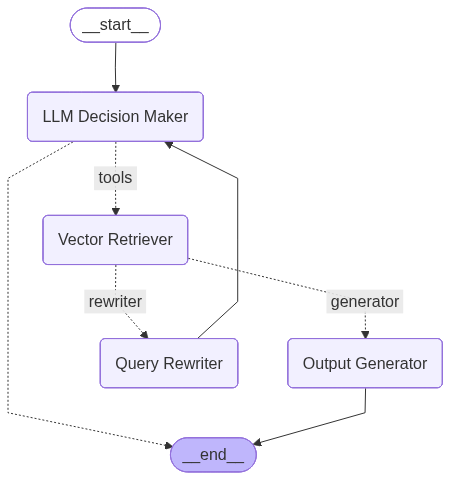

In [151]:
display(Image(app.get_graph().draw_mermaid_png()))

In [153]:
for output in app.stream({"messages":[" Can you explain me what is task decomposition and why Chain of thought (COT; Wei et al. 2022) has become a standard prompting technique for enhancing model perfromance on complex task."]}):
    for key, val in output.items():
        print(f"here is the output from {key}")
        print("____")
        print(val)
        print("\n")


----CALL LLM_DECISION_MAKER----
here is the output from LLM Decision Maker
____
{'messages': [AIMessage(content='Absolutely! Let’s break down both concepts:\n\n### Task Decomposition\n\n**Task decomposition** is the process of breaking a complex task into smaller, more manageable subtasks. This approach is crucial in AI and machine learning because:\n\n- **Complex tasks** often require multiple steps or reasoning stages.\n- By decomposing the task, models (like LLMs) can focus on solving each subproblem sequentially or in parallel, making the overall problem easier to solve.\n- It improves accuracy, interpretability, and efficiency.\n\nFor example, if you ask an AI to solve a math word problem, task decomposition would involve:\n1. Understanding the question,\n2. Identifying relevant information,\n3. Performing calculations,\n4. Providing the final answer.\n\n### Chain of Thought (CoT) Prompting\n\n**Chain of Thought (CoT) prompting** is a technique introduced by Wei et al. (2022) wher